In [16]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams['svg.fonttype'] = 'none'
rcParams['font.size']=10
import pandas as pd
import numpy as np
import math
import matplotlib.patches as mpatches
from statsmodels.stats.multitest import multipletests
from seaborn import pointplot

In [17]:
inFile = '/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/gwas_enrichments/monocyte_microglia/kunkle_enrichments.cell_type_results.txt'
kunkle_data = pd.read_csv(inFile, sep="\t", header=0)

In [18]:
inFile = '/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/gwas_enrichments/monocyte_microglia/jansen_enrichments.cell_type_results.txt'
jansen_data = pd.read_csv(inFile, sep="\t", header=0)

In [19]:
jansen_data.head()

,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,gosselin_microglia,4.415073e-08,3.694149e-08,0.116014
1,monocyte_dnase,1.042658e-08,2.829146e-08,0.356235


In [20]:
kunkle_data.head()

,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,monocyte_dnase,2.954993e-07,1.438036e-07,0.019945
1,gosselin_microglia,-1.202519e-07,1.598233e-07,0.774096


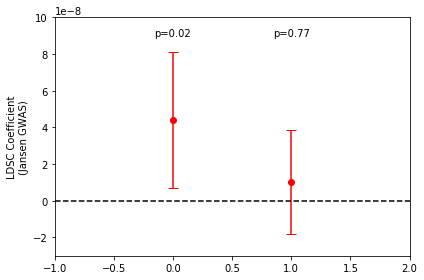

In [66]:
dims = (20, 16)
plt.errorbar([0,1], y=jansen_data["Coefficient"],
                yerr=jansen_data["Coefficient_std_error"],
                fmt='o',
                capsize=5,
                ecolor='red',
                markerfacecolor='red',
                markeredgecolor='red')

plt.axhline(y=0,linestyle='--', c='k')

plt.text(0,
         9e-8,
         "p="+str(p_values[0]),
         fontsize=10,
         ha='center')
plt.text(1,
         9e-8,
         "p="+str(p_values[1]),
         fontsize=10,
         ha='center')

plt.xlim([-1,2])
plt.ylim([-3e-8,10e-8])

plt.ylabel("LDSC Coefficient\n(Jansen GWAS)", fontsize=10)
plt.xlim(-1,2)
plt.tight_layout()
plt.savefig("monocyte_microglia_pairwise_jansen.svg")

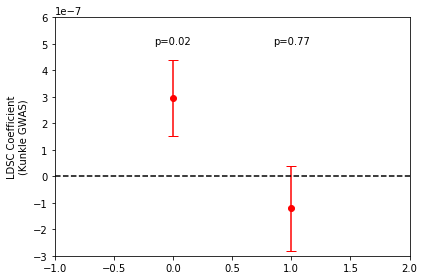

In [61]:
dims = (20, 16)
plt.errorbar([0,1], y=kunkle_data["Coefficient"],
                yerr=kunkle_data["Coefficient_std_error"],
                fmt='o',
                capsize=5,
                ecolor='red',
                markerfacecolor='red',
                markeredgecolor='red')


p_values = list(kunkle_data["Coefficient_P_value"])
p_values = [round(val,2) for val in p_values]

plt.text(0,
         5e-7,
         "p="+str(p_values[0]),
         fontsize=10,
         ha='center')
plt.text(1,
         5e-7,
         "p="+str(p_values[1]),
         fontsize=10,
         ha='center')

plt.xlim([-1,2])
plt.ylim([-3e-7,6e-7])
plt.axhline(y=0,linestyle='--', c='k')
plt.ylabel("LDSC Coefficient\n(Kunkle GWAS)", fontsize=10)
plt.tight_layout()
plt.savefig("monocyte_microglia_pairwise_kunkle.svg")